

*   Le but du projet est de faire la classification des émotions des personnes en se basant sur leurs images.
*   Dans cet étude de cas on va considéré qu'on est consultant en AI/ML et qu'on a été recruté par une start-up à San Diego afin de construire, d'entrainer et de déployer un système qui monitore automatiquement les émotions et les expressions faciales des personnes.
*   L'équipe a collecté plus de 20 milles images de faces humaines, avec leurs expressions faciales labélisées et environ 2000 images avec leurs annotations des points-clés faciales.



# Partie 1 : Détection des points faciales clés  

* Dans la première partie, on va créer un modèle de deep learning basé sur les Réseaux de Neurones Convolutionnels et des Blocks Résiduels pour calculer ( ou prédire ) les points faciales clés.
* Le dataset qu'on a ici comporte des coordonnées (x et y) de 15 points faciales clés.
* Les images d'input sont au format 96X96 pixels.
* Les images sont seulement à la couleur Noire et Blanche. 

## 1 - Importation des Librairies et des Datasets

In [ ]:
  # Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/Modern Artificial Intelligence Masterclass UDEMY/

/content/drive/My Drive/Colab Notebooks/Modern Artificial Intelligence Masterclass UDEMY


In [ ]:
# Import the necessary packages

import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
dataset_Dr = "/content/drive/My Drive/Colab Notebooks/Modern Artificial Intelligence Masterclass UDEMY/Emotion AI Dataset/"

In [ ]:
# On charge le dataset des points faciales clés
keyfacial_df = pd.read_csv(dataset_Dr+"data.csv")

In [ ]:
keyfacial_df

left_eye_center_x  ...                                              Image
0             66.033564  ...  238 236 237 238 240 240 239 241 241 243 240 23...
1             64.332936  ...  219 215 204 196 204 211 212 200 180 168 178 19...
2             65.057053  ...  144 142 159 180 188 188 184 180 167 132 84 59 ...
3             65.225739  ...  193 192 193 194 194 194 193 192 168 111 50 12 ...
4             66.725301  ...  147 148 160 196 215 214 216 217 219 220 206 18...
...                 ...  ...                                                ...
2135          67.180378  ...  191 191 191 190 189 185 184 120 54 34 19 24 31...
2136          65.724490  ...  19 19 19 18 13 7 3 4 3 1 3 9 11 12 12 13 10 9 ...
2137          68.430866  ...  31 40 47 31 54 58 63 100 86 80 82 75 79 86 90 ...
2138          64.152180  ...  7 1 5 1 3 20 12 0 5 8 6 18 13 9 8 12 12 11 4 8...
2139          66.683755  ...  68 19 19 23 19 26 23 16 8 15 9 9 17 16 15 27 2...

[2140 rows x 31 columns]

In [ ]:
#Obtenir des informations relevantes du dataset
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [ ]:
# Vérifier si le dataframe contient des valeurs nulles 
keyfacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [ ]:
# Vérifier le nombre d'images contenu dans le dataframe
keyfacial_df["Image"].shape

(2140,)

In [ ]:
#Ici on va appliquer une fonction Lambda de ( x ) qui  va pendre n'importe quel élément x présent 
# dans la colonne "Image" et va le convertir en un array Numpy en utilisant la fonction "np.fromstring" et
#  enfin va convertir l'array 1D en array 2D avec des dimensions (96 x 96)
keyfacial_df["Image"] = keyfacial_df["Image"].apply(lambda  x: np.fromstring(x, dtype=int, sep=' ').reshape(96,96))

In [ ]:
# Obtenir la dimension de la première image
keyfacial_df["Image"][0].shape

(96, 96)

In [ ]:
keyfacial_df['right_eye_center_x'].min()

18.922610628599998

In [ ]:
keyfacial_df['right_eye_center_x'].max()

42.495171727

In [ ]:
#Les statistiques descriptives de mon dataframe
keyfacial_df.describe()

left_eye_center_x  ...  mouth_center_bottom_lip_y
count        2140.000000  ...                2140.000000
mean           66.221549  ...                  82.630412
std             2.087683  ...                   4.813557
min            47.835757  ...                  57.232296
25%            65.046300  ...                  79.417480
50%            66.129065  ...                  82.388899
75%            67.332093  ...                  85.697976
max            78.013082  ...                  95.808983

[8 rows x 30 columns]

## 2 : Visualisation des images 

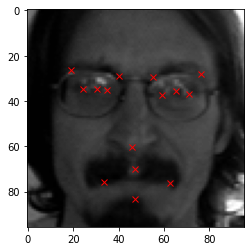

In [ ]:
"""
#  Dans cette partie on va visualiser une image aléatoirement dans le Dataframe 
 - Les images sont obtenues à partir du datframe sont représentées en utilisant la foncton "plt.imshow" 
 et son accompagnés de 15 coordonnées ( x et y )
 - Lorsque les coordonnées x sont dans les colonnes dont les indexes sont (0,2,4,...), alors les coordonnées y
 ont des indexes impaires (1,3,5,...) et pour accéder à leurs valeurs on utilise la fonction ".loc"
  
"""
i = np.random.randint(1, len(keyfacial_df))
plt.imshow(keyfacial_df["Image"][i], cmap= "gray")
# Maintenat on représente les coordonnées des points faciales clés
for j in range(1, 31, 2):
  plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], "rx")
  # L'argument "rx" signifie (Red X), c'est la couleur et la forme d'une coordonnée

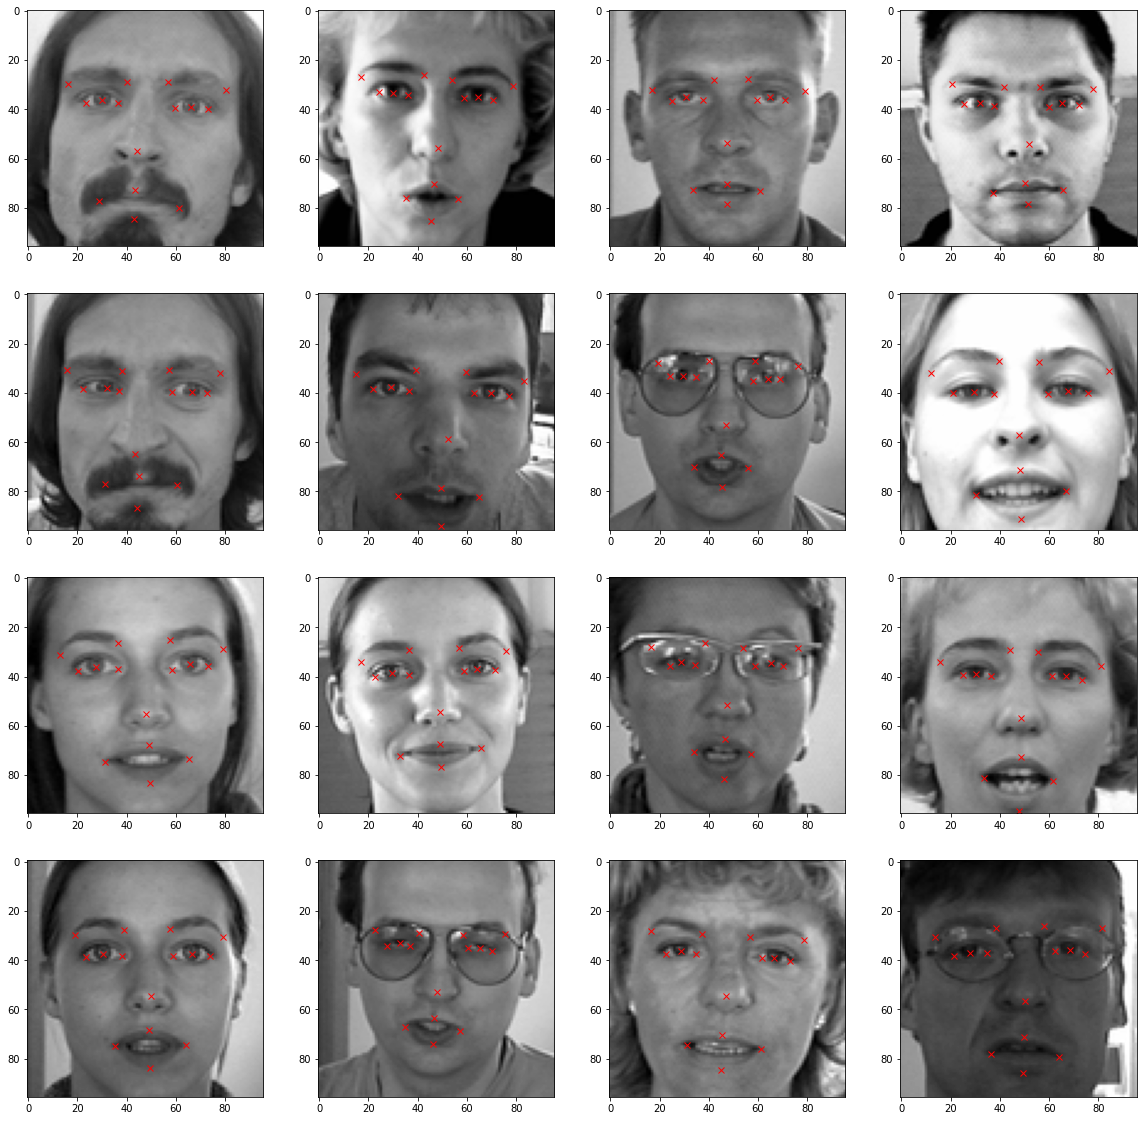

In [ ]:
# Maintenant on va faire la représentation de plusieurs images dans un Grid de 4 lignes et colonnes
fig = plt.figure(figsize=(20,20))

for i in range(16):
  ax = fig.add_subplot(4, 4, i+1)
  image = plt.imshow(keyfacial_df["Image"][i], cmap="gray")
  for j in range(1, 31, 2):
    plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], "rx")

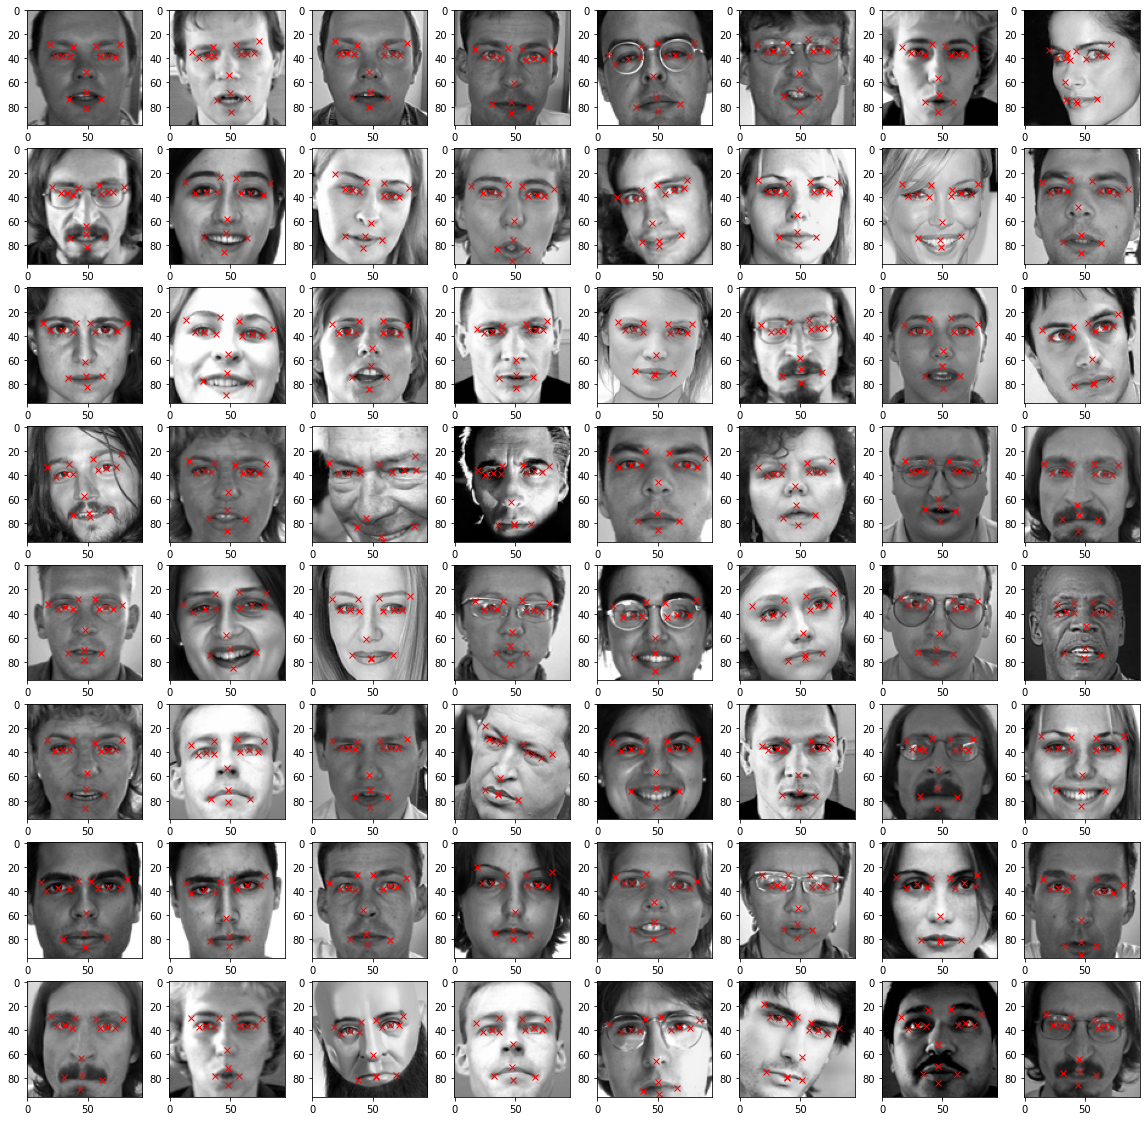

In [ ]:
import random
# Challenge : Visualisation aléatoire de 64 nouvelles images dans une grille 
fig = plt.figure(figsize=(20,20))

for i in range(64):
  k = random.randint(1, len(keyfacial_df))
  ax = fig.add_subplot(8, 8, i+1)
  image = plt.imshow(keyfacial_df["Image"][k], cmap="gray")
  for j in range(1, 31, 2):
    plt.plot(keyfacial_df.loc[k][j-1], keyfacial_df.loc[k][j], "rx")

## 3 : Augmentation d'image

*   L'augmentation d'image consiste à fabriquer un dataset additionnel en appliquant sur les images des rotations, augmenter la luminosité, etc.. Et en faisant cela on peut augmenter les capacités de généralisation du modèle.
*   Élément de liste




In [ ]:
#On crée une copie du dataframe
import copy
keyfacial_df_copy = copy.copy(keyfacial_df)

In [ ]:
#On récupère les colonnes du dataframe sans la colonne "Image" d'où le [:-1]
columns = keyfacial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [ ]:
# Inversion Horizontale - On va faire une inversion sur l'axe y
keyfacial_df_copy["Image"] = keyfacial_df_copy["Image"].apply(lambda x: np.flip(x, axis = 1))

#Lorsqu'on fait l'inversion horizontale, les valeurs de coordonnées de y devrait être pareilles
#Seule les valeurs de coordonnées de x changent.
for i in range(len(columns)):
  if i%2 == 0:
    #Cette fonction permet de faire la rotation
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x))

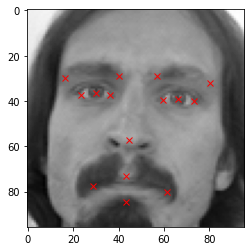

In [ ]:
#Représenter l'image Originale
plt.imshow(keyfacial_df["Image"][0], cmap= "gray")
for j in range(1,31,2):
  plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], "rx") 

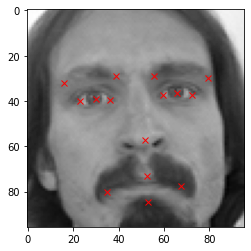

In [ ]:
#Représenter l'image inversée
plt.imshow(keyfacial_df_copy["Image"][0], cmap= "gray")
for j in range(1,31,2):
  plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], "rx") 

In [ ]:
# Concatener le dataframe original au Dataframe augmenté
augmented_df = np.concatenate((keyfacial_df, keyfacial_df_copy))
augmented_df.shape

(4280, 31)

In [ ]:
"""
Ensuite on va augmenter la brillance des images. Pour cela on va multiplier les valeurs de pixel par
des valeurs aléatoires comprises entre 1,5 et 2 afin d'augmenter la brillance des images. 
Il faut noter que pour éviter les valeurs de pixel dépassent 255, on va limiter la valeur de la multiplication 
en se servant de la fonction "np.clip()"
"""

import random

keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy["Image"] =  keyfacial_df_copy["Image"].apply(lambda x : np.clip(random.uniform(1.5, 2) * x, 0.0, 255.0))
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy))
augmented_df.shape

(6420, 31)

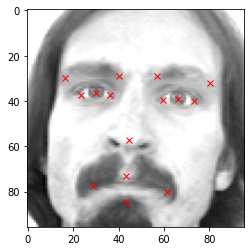

In [ ]:
# Afficher l'image avec la brillance augmentée

plt.imshow(keyfacial_df_copy["Image"][0], cmap = "gray")
for j in range(1, 31, 2):
  plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], "rx")

 ## 5 - Normalisation des données et préparation des données d'entrainement

* En normalisant les données, on améne les valeurs de pixel comprises ente 0 et 255, à une valeure comprise entre 0 et 1. 



In [ ]:
# Obtenir la valeur des images qui sont présentent dans la 31ième colonne
img = augmented_df[:,30]

# Normaliser les images 
img = img/255.

# Créer un array vide de dimensions (x, 96, 96, 1) pour alimenter le modèle
X = np.empty((len(img), 96, 96, 1))

# Itérer à travers la liste d'images et ajouter les valeurs d'images à un array vide puis en élargissant 
# ses dimensions de (96, 96) à (96, 96, 1). Cela pour mettre le format du array en format batch, 
# qui est un formaat utilisé pour l'entrainement du modèle 
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis=2)

# Convertir le type de l'array en float3
X = np.asarray(X).astype(np.float32)
X.shape 

(6420, 96, 96, 1)

In [ ]:
 # Obtenir la valeur des coordonnées x et y qui est sont utilisés comme variable cible
 # Pour cela on récupére toutes les lignes du dataframe "augmented_df" et toutes les colonnes sauf la 
 # 31ième colonne. 
 y = augmented_df[:, :30]
 y = np.asarray(y).astype(np.float32)
 y.shape

(6420, 30)

In [ ]:
# Splitter les données en donnée de train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
X_train.shape

(4815, 96, 96, 1)

In [ ]:
X_test.shape

(1605, 96, 96, 1)

## 6 : Comprendre la théorie et l'intuition derrière les réseaux de neurones

### - Modéle mathématique d'une neurone

* Le cerveau contient plus de 100 milliards de neurones communiquantes à travers des signaux electriques et chimiques. Les neurones communiquent entre elles et nous aide à voire, penser et générer des idées. 

* Le cerveau humain apprend en créant des connections au sein des neurones. Les réseaux de neurones artificielles (ANN) sont des modèles de traitement d'informations  inspirés du cerveu humain.

* Les neurones collectent les signaux à partir des chaines d'entrée appelées Dendrites, qui traitent les informations dans son Nucleus et ensuite générent un résultat le long d'une branche mince appelé Axon. 


---


### - Les Fonctions d'activation

* SIGMOID : 
      *   Cette fonction prend les valeurs et les fixe à une valeur comprise entre 0 et 1.  
      *   Cette fonction convertir les nombres négatifs grands en 0 et les nombres positifs en 1
      *   Elle est généralement utilisé dans le layer Output pour le réseau perceptron multichouche


* ReLU (Retified Linear Units)
      *    Si la valeur en input est inférieur à 0 alors cette fonction régle le résultat à 0. C'est fonction permet d'éviter la non linéarité dans le réseau de neurones.
      *    ReLu ne sature pas alors elle évite le problème de la disparition du gradient 
      *    Elle utiise un seuillage simple donc elle efficiente sur le plan du traitement informatique
      *    La fonction est généralement utilisée dan les couches cachées  


* Hyperbolic Tangent
      *    La fonction "Tanh" est similaire fonction Sigmoid mais ça différence est qu'elle transforme es valeurs d'entrées en une valeur comprise entre (-1 et 1), donc les outputs sont centrés sur le zero.
      *    La "Tanh" souffre du problème de la disparition du gradient car elle tue le gradient quand elle saturée
      *    En pratique, la "Tanh" est préférable à la Sigmoïd   
     


 


## 7 -    Comprendre le processus d'entrainement des réseaux de neurones et l'algorithme "Gradient Descent"

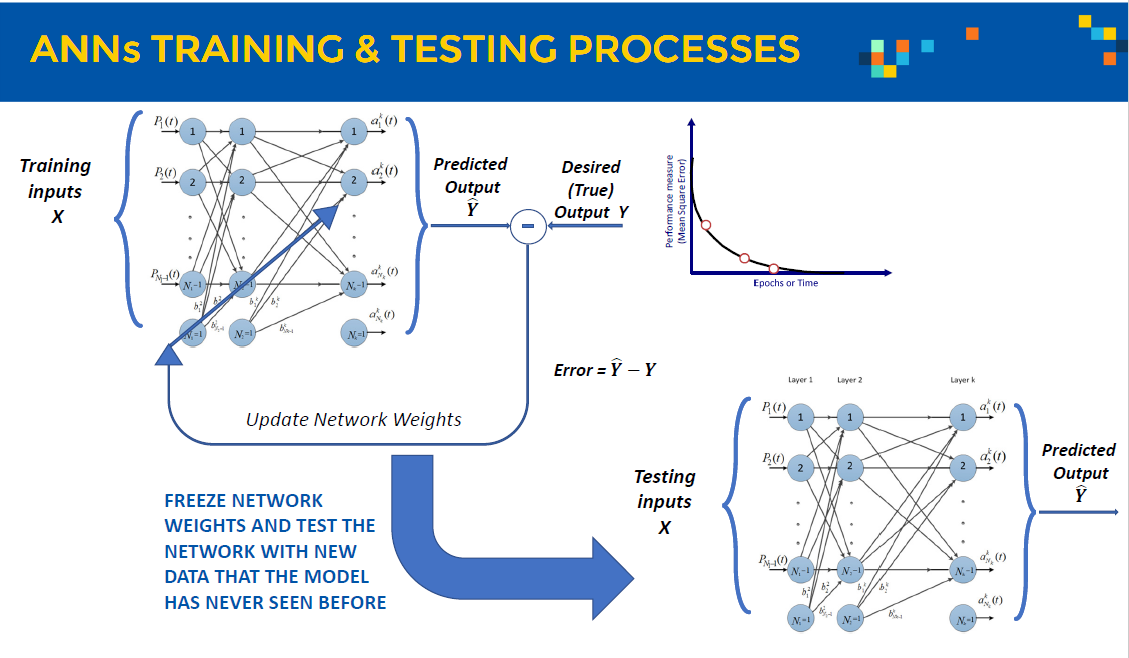

* Une fois que les inputs rentrent dans le réseau de neurones un résultat ou prédiction (Y chapeau) est généré par le modèle. 
* Puis ce résultat est différencié par le vrai résultat (Y) qui est sous forme de label. Le résultat de cette différence constitue l'erreur. 
* Ensuite on recommencement l'entrainement puis on met à jour les poids des neurones.

* Une fois que l'entrainement est fini, on passe maintenant à la phase test, et pour cela on gélé les poids du réseau de neurones, puis on évalue le modéle déjà entrainé sur de nouvelles données de test et ainsi généré de nouvelles prédictions.

### - Diviser les données en jeu de données d'entrainement et de test

*  Le jeu de données est généralement divisé en 80 % pour le training et 20 % pour le testing

*  Parfois, on devra inclure le dataset de la crosse validation également et alors on divise le dataset en segment de 60% , 20% , 20% (les nombres peuvent varier)



      1.   Les données d'entrainement sont utilisés pour le calcul du gradient et la mise à jour des poids. 
      2.   Les données de validations:

            * Sont utilisées pour la cross-validation pour évaluer la qualité de la formation au fur et à mesure de son déroulement
            *  La cross-validation est implémentée pour surmonter l'over-fitting qui apparaît quand l'algorithme se focalise sur les détails de l'ensemble d'entrainement au coût de perdre l'abilité pour la généralisation.
      3.   Les données de test : sont utilisés pour tester le réseau de neurones déja entrainé

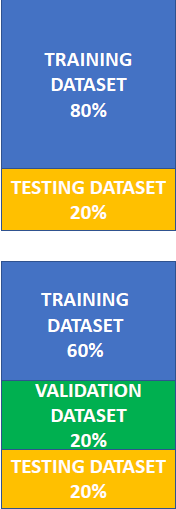

### - Gradient Descent 


*  Le "Gradient Descent" est un algorithme d'optimisation utilisé pour obtenir les poids du réseau optimisé et la valeur du biais.

* Il marche en essayant itérativement de minimiser la fonction coût ("cost function"). 

*  Il marche en calculant le gradient de la fonction coût ("cost function") et en se déplaçant dans une direction négative jusqu'à ce que le minimum local ou global soit atteint.

*  Si le positif du gradient est pris, le maximum local ou global est atteint.

*  La taille des étapes (step size) prises sont appelées le "learning rate" 

*  Si le "learning rate" augmente, la surface couverte dans l'espace de recherche va augmenter aussi, alors on pourrait atteindre rapidement le minimum global 

*  Mais, on peut dépasser la cible. 

*  Pour les petits "learning rates", l'entrainement du modèle va prendre plus de temps pour atteindre la valeur optimale des poids. 

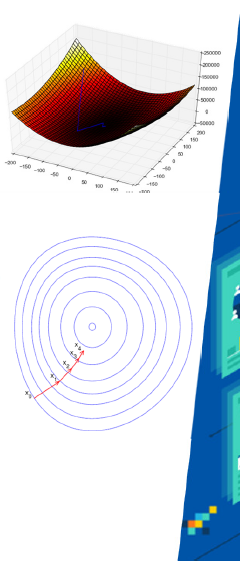

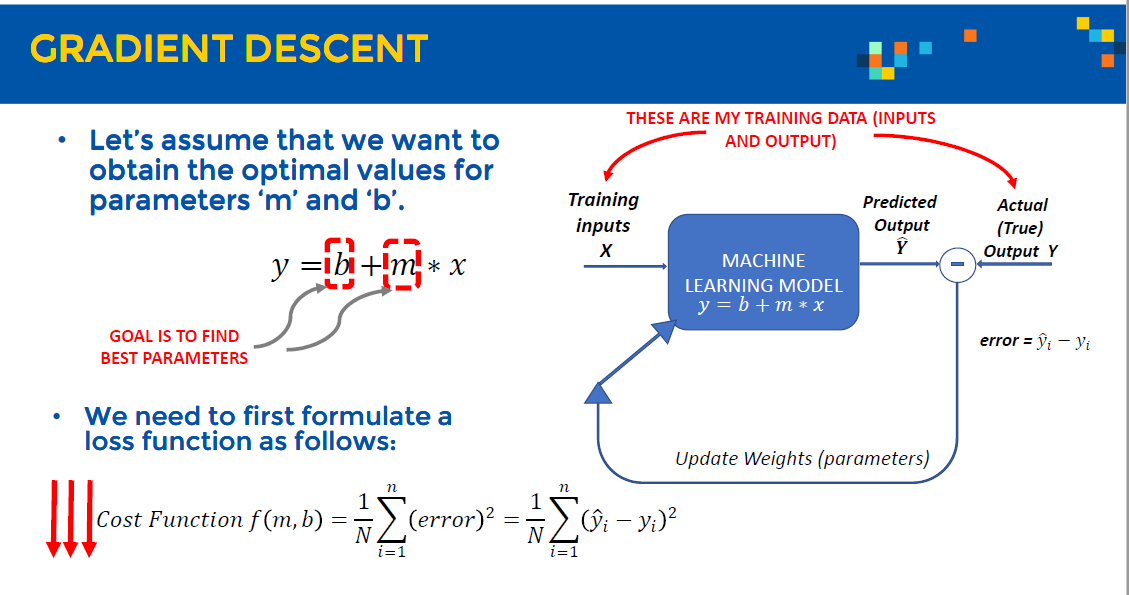

**Mon but est de trouver les meileures valeurs des paramétres représentés par (b et m) dont b = biais et m = poids.**

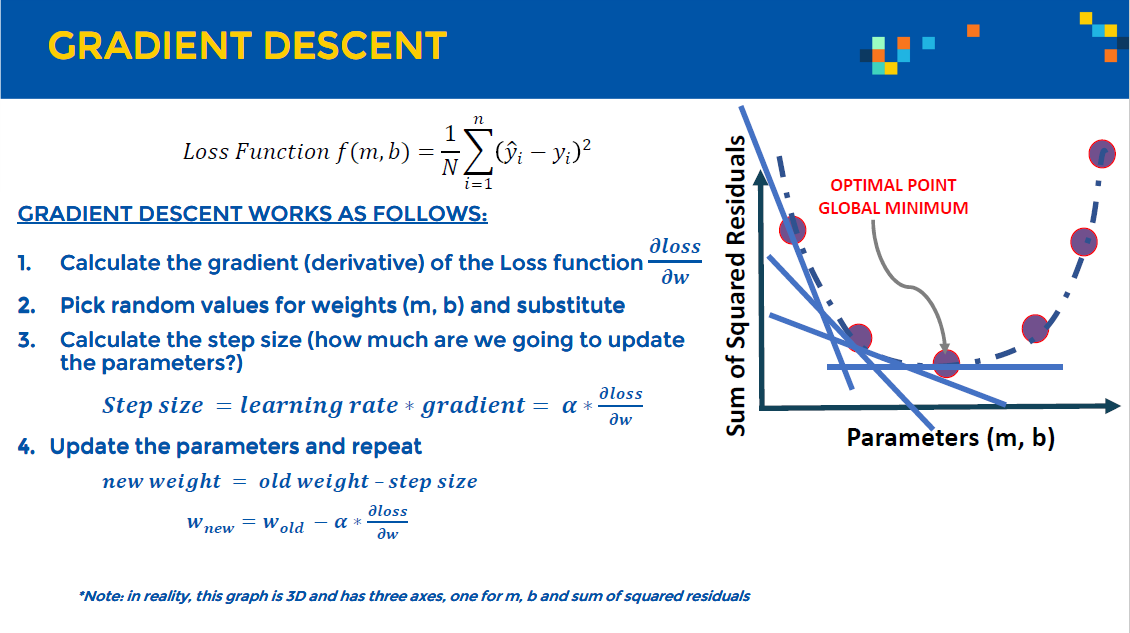



1.   Premièrement on calcule le gradient ou la dérivée partielle de la "loss function" ("cost function") par rapport au poids (m et b)   
2.   Ensuite on choisit une valeures aléatoires pour les poids (m et b) et substitut 
3.   Aprés cela on calcule le "step size" (combien de fois on va mettre à jour les paramètres)
4.   Enfin, une fois que le "step size" est trouvé on calcule le nouveau poids, en soustrayant la valeur du "step size" à la valeur du poids précédant.



## 8 - Comprendre la théorie et l'intuition derrière les réseaux de neurones et le RESNETS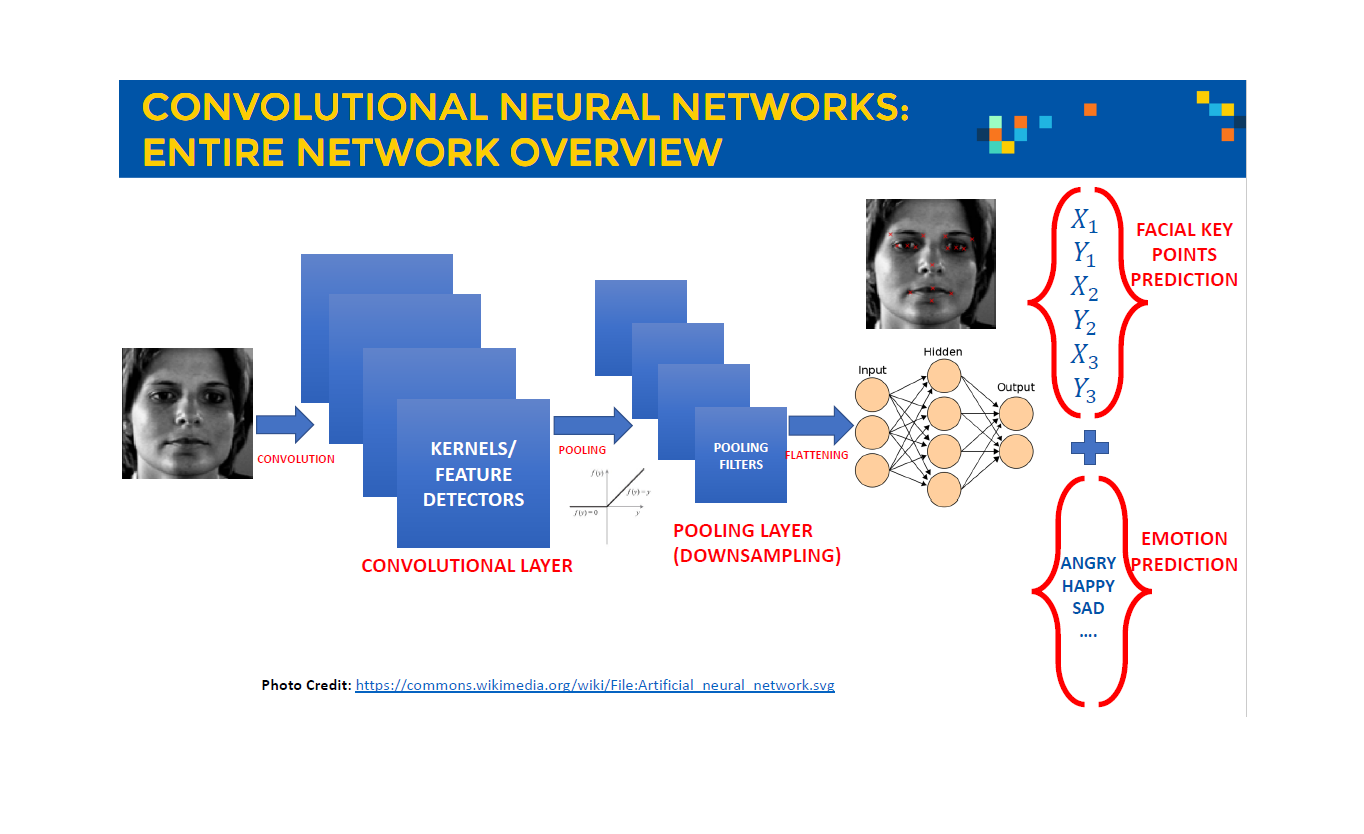 

Comme on le voit dans le modèle de réseau de neurones ci-dessus, lorsque l'image rentre en input, on y applique ce que l'on appelle une convolution, c'est-à-dire qu'on va essayer d'extraire les features à partir de l'image d'input , ce qui est aussi appelé "Kernels ou Feature Detectors" et sont contenus dans le Layer Convolutionnel. Ensuite on va appliquer sur ces features ce que l'on appelle du "Pooling"(Regroupement) ou "DownSampling" (Echantillonage), ce processus s'effectue en recupérant les cartes de features puis les compresser ou réduire leurs tailles juste pour réduire l'exigence de la puissance de traitement lors de l'entrainement du modèle.
Une fois cela effectué, on peut maintenant prendre les pixels contenues dans "Pooling Layer" et y effectuer du "Flattening" (ou Aplatissement) des valeurs de pixels. 
Si on fini cette étape on prend les valeurs de pixels aplaties pour alimenter des réseaux neuronaux artificiels complexes. 

* Par exemple dans ce projet à réaliser on va construire 2 réseaux neuronaux artificiels, d'où le premier va servir à détecter les points faciales clés et l'autre va permettre de faire la détection d'émotion (colèreux, joyeux, triste, ...)

### **RESNET (Residual Network)**

* Plus les CNN s'agrandissent en profondeur, la disparition ou la descente du gradient tend à se produire ce qui impacte négativement la performance du réseau car le gradient sera tellement petit qu'il pourra plus mettre à jour les poids du réseau neuronal 

* Le problème de la descente du gradient se produit quand le gradient est rétro-propagé (back-propagated) aux layers (couches)  précédentes, ce qui se traduit par une très faible pente.

* Le "Residual Neural Network" inclu la fonctionnalité "skip connection" qui permet l'entrainement de 152 layers sans problème de disparition du gradient.

* Le RESNET marche en ajoutant du "identity mappings" en haut du CNN.

* "ImageNet" est une base de donnéees qui contient 11 millions d'images dont 11000 catégories.

* Cette base de donnée est utilisée pour entrainer le réseau neuronal profond "ResNet"


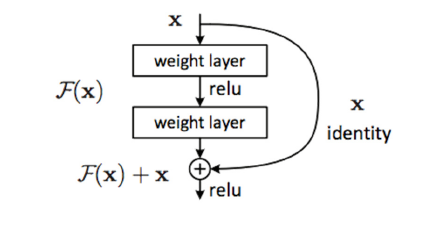


**Architecture du Modèle à constuire**



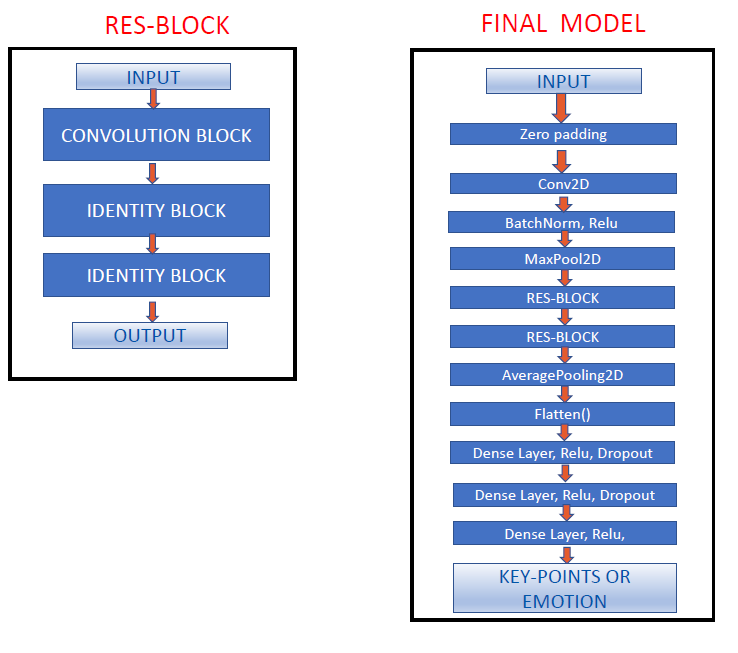
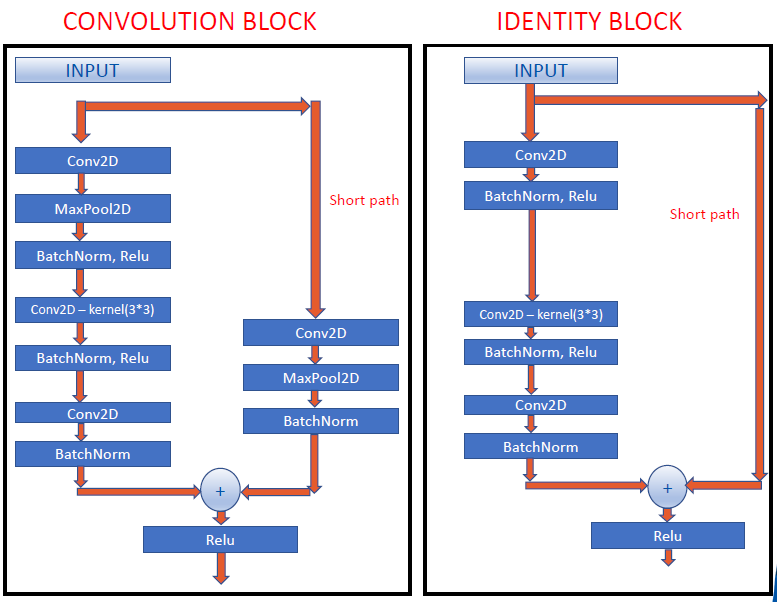

## 9 - Contruire un modèle de détection des points faciaux clés avec un réseau neuronal résiduel profond 

In [ ]:
# La fonction pour construire le bloc résiduel (Res-Block)
def res_block(X, filter, stage):

  # Convolution Block
  X_copy = X

  f1, f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name = "res_"+str(stage)+"_conv_a", kernel_initializer = glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis=3, name = "bn_"+str(stage)+"_conv_a")(X)
  X = Activation("relu")(X)

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X
   

In [ ]:
# Le réseau de neurones convolutifs
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - stage
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128,128,512], stage= 3)


# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


model_1_facialKeyPoints = Model( inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
______________________________________________________________________________________________

## 10 - Compiler et entrainer le modèle de Deep Learning pour la détection des points faciaux clés

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])
# Check this out for more information on Adam optimizer: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

In [ ]:
# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose = 1, save_best_only = True)

In [ ]:
history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 32, epochs = 100, validation_split = 0.05, callbacks=[checkpointer]) 

Epoch 1/100
143/143 [==============================] - 3s 18ms/step - loss: 81.2557 - accuracy: 0.6657 - val_loss: 154.8100 - val_accuracy: 0.6846

Epoch 00001: val_loss did not improve from 126.02277
Epoch 2/100
143/143 [==============================] - 2s 17ms/step - loss: 78.6018 - accuracy: 0.6974 - val_loss: 133.7920 - val_accuracy: 0.7137

Epoch 00002: val_loss did not improve from 126.02277
Epoch 3/100
143/143 [==============================] - 2s 17ms/step - loss: 78.9702 - accuracy: 0.6871 - val_loss: 141.6646 - val_accuracy: 0.6971

Epoch 00003: val_loss did not improve from 126.02277
Epoch 4/100
143/143 [==============================] - 2s 17ms/step - loss: 80.0790 - accuracy: 0.6847 - val_loss: 147.4138 - val_accuracy: 0.6763

Epoch 00004: val_loss did not improve from 126.02277
Epoch 5/100
143/143 [==============================] - 2s 17ms/step - loss: 81.0096 - accuracy: 0.6734 - val_loss: 130.8016 - val_accuracy: 0.6971

Epoch 00005: val_loss did not improve from 126.0

In [ ]:
 # save the model architecture to json file for future use

model_json = model_1_facialKeyPoints.to_json()
with open("FacialKeyPoints-model.json","w") as json_file:
  json_file.write(model_json)


## 11 - Evaluer les performances du modèle de détection des points faciaux clés 


In [ ]:
with open('FacialKeyPoints-model.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# load the model architecture 
model_1_facialKeyPoints = tf.keras.models.model_from_json(json_savedModel)
model_1_facialKeyPoints.load_weights('FacialKeyPoints_weights.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1_facialKeyPoints.compile(loss="mean_squared_error", optimizer= adam , metrics = ['accuracy'])

In [ ]:
# Evaluate the model

result = model_1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

51/51 [==============================] - 1s 7ms/step - loss: 62.6847 - accuracy: 0.7500
Accuracy : 0.7439252138137817


In [ ]:
# Get the model keys 
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

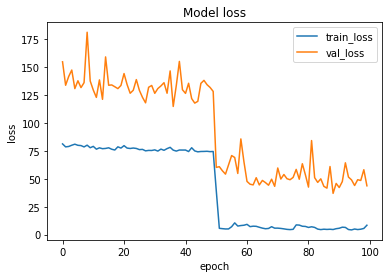

In [ ]:
# Plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

# Partie 2 : DETECTION DES EXPRESSIONS FACIALES

## 12 - Importer et Explorer le dataset pour la détection d'expression faciale

In [ ]:
# read the csv files for the facial expression data
facialexpression_df = pd.read_csv(dataset_Dr+'icml_face_data.csv')

In [ ]:
facialexpression_df

emotion                                             pixels
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1            0  151 150 147 155 148 133 111 140 170 174 182 15...
2            2  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3            2  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4            3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
...        ...                                                ...
24563        3  0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
24564        0  181 177 176 156 178 144 136 132 122 107 131 16...
24565        3  178 174 172 173 181 188 191 194 196 199 200 20...
24566        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
24567        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...

[24568 rows x 2 columns]

In [ ]:
facialexpression_df[' pixels'][0] # String format

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [ ]:
# function to convert pixel values in string format to array format

def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

In [ ]:
# Resize images from (48, 48) to (96, 96)

def resize(x):
  
  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

In [ ]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: string2array(x))

In [ ]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: resize(x))

In [ ]:
facialexpression_df.head()

emotion                                             pixels
0        0  [[69.316925, 73.03865, 79.13719, 84.17186, 85....
1        0  [[151.09435, 150.91393, 150.65791, 148.96367, ...
2        2  [[23.061905, 25.50914, 29.47847, 33.99843, 36....
3        2  [[20.083221, 19.079437, 17.398712, 17.158691, ...
4        3  [[76.26172, 76.54747, 77.001785, 77.7672, 78.4...

In [ ]:
# check the shape of data_frame
facialexpression_df.shape

(24568, 2)

In [ ]:
# check for the presence of null values in the data frame
facialexpression_df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [ ]:
label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

### **MINI CHALLENGE**

* Visualiser la première image dans le dataframe et vérifier que les images ne sont pas distortu par l'opération de redimensionnement ou de retaillement

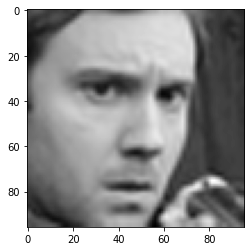

In [ ]:
plt.imshow(facialexpression_df[' pixels'][0], cmap = 'gray')

## 13 - Visualiser les images et représenter les labels 


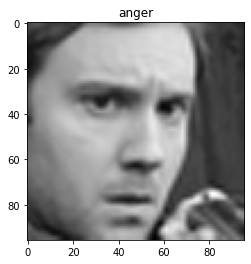

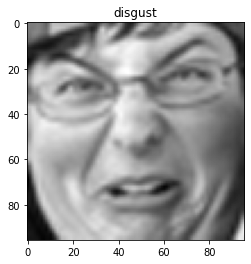

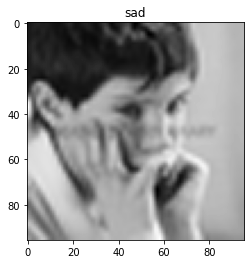

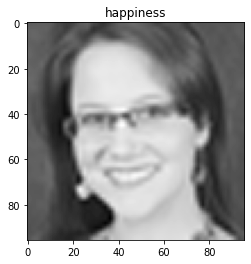

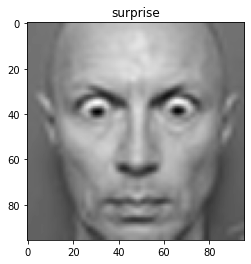

In [ ]:
emotions = [0, 1, 2, 3, 4]

for i in emotions:
  data = facialexpression_df[facialexpression_df['emotion'] == i][:1]
  img = data[' pixels'].item()
  img = img.reshape(96, 96)
  plt.figure()
  plt.title(label_to_text[i])
  plt.imshow(img, cmap = 'gray')

### **MINI CHALLENGE**

* Représenter un diagramme en barres pour ressortir combien d'images sont présentes par émotions. 

In [ ]:
facialexpression_df.emotion.value_counts().index

Int64Index([3, 2, 0, 4, 1], dtype='int64')

In [ ]:
facialexpression_df.emotion.value_counts()

3    8989
2    6077
0    4953
4    4002
1     547
Name: emotion, dtype: int64

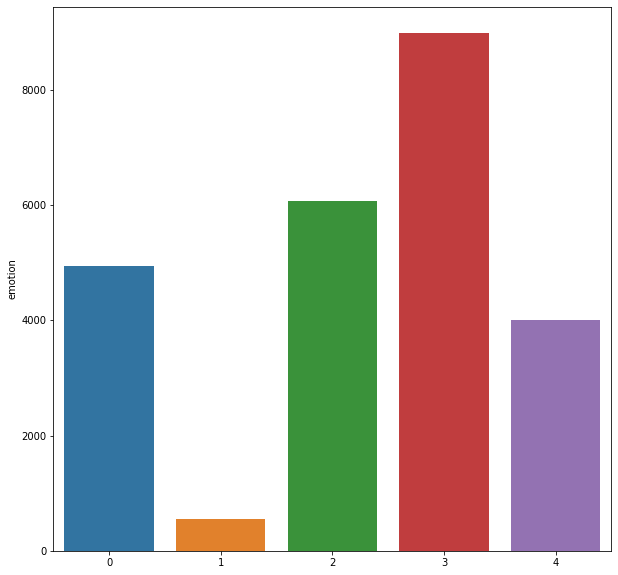

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = facialexpression_df.emotion.value_counts().index, y = facialexpression_df.emotion.value_counts())

## 14 - Effectuer la préparation des données et l'augmentation d'images

*  Dans l'actvité précédente j'ai fait la représentation graphique du nobre d'images présentes par classes et on a vu que le dataset est non balancé donc ce qu'on doit faire c'est d'essayer de balancer le dataset en faisant de l'augmentation de données pour les classes dont le nombre d'images est faible.


In [ ]:
# Découper le dataset en "features" et "labels"
from keras.utils import to_categorical

X = facialexpression_df[" pixels"]
y = to_categorical(facialexpression_df["emotion"])
 


In [ ]:
X[0]

array([[ 69.316925,  73.03865 ,  79.13719 , ...,  40.73619 ,  40.6584  ,
         40.5394  ],
       [ 68.66325 ,  70.95224 ,  74.71768 , ...,  43.274765,  42.037186,
         41.223618],
       [ 67.768814,  67.71646 ,  67.67172 , ...,  47.39473 ,  44.26329 ,
         42.31465 ],
       ...,
       [ 74.89021 ,  76.79553 ,  79.90259 , ...,  71.463425,  59.32875 ,
         51.74736 ],
       [ 76.68126 ,  75.808105,  74.25452 , ...,  93.943375,  79.77934 ,
         71.13246 ],
       [ 77.63858 ,  75.15074 ,  70.8846  , ..., 107.66351 ,  92.23212 ,
         82.91585 ]], dtype=float32)

In [ ]:
X = np.stack(X, axis =0)
X = X.reshape(24568, 96, 96, 1)

X[0]

array([[[ 69.316925],
        [ 73.03865 ],
        [ 79.13719 ],
        ...,
        [ 40.73619 ],
        [ 40.6584  ],
        [ 40.5394  ]],

       [[ 68.66325 ],
        [ 70.95224 ],
        [ 74.71768 ],
        ...,
        [ 43.274765],
        [ 42.037186],
        [ 41.223618]],

       [[ 67.768814],
        [ 67.71646 ],
        [ 67.67172 ],
        ...,
        [ 47.39473 ],
        [ 44.26329 ],
        [ 42.31465 ]],

       ...,

       [[ 74.89021 ],
        [ 76.79553 ],
        [ 79.90259 ],
        ...,
        [ 71.463425],
        [ 59.32875 ],
        [ 51.74736 ]],

       [[ 76.68126 ],
        [ 75.808105],
        [ 74.25452 ],
        ...,
        [ 93.943375],
        [ 79.77934 ],
        [ 71.13246 ]],

       [[ 77.63858 ],
        [ 75.15074 ],
        [ 70.8846  ],
        ...,
        [107.66351 ],
        [ 92.23212 ],
        [ 82.91585 ]]], dtype=float32)

In [ ]:
 y


array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [ ]:
# découper le dataframe en dataframe de train, de test et de validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_Train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_test, y_Val, y_Test = train_test_split(X_test, y_Test, test_size = 0.5, shuffle = True)

In [ ]:
print(X_val.shape, y_Val.shape)

(1228, 96, 96, 1) (1228, 5)


In [ ]:
print(X_train.shape, y_Train.shape)

(22111, 96, 96, 1) (22111, 5)


In [ ]:
print(X_test.shape, y_Test.shape)

(1229, 96, 96, 1) (1229, 5)


In [ ]:
# Image pre-processing

X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [ ]:
X_train

array([[[[0.18720895],
         [0.17570466],
         [0.15729167],
         ...,
         [0.02386349],
         [0.03189033],
         [0.03666579]],

        [[0.19053465],
         [0.17912191],
         [0.1608597 ],
         ...,
         [0.02709799],
         [0.03285505],
         [0.03628289]],

        [[0.19580737],
         [0.18457773],
         [0.16661713],
         ...,
         [0.03235528],
         [0.03442365],
         [0.03566248]],

        ...,

        [[0.55268735],
         [0.5484137 ],
         [0.54223955],
         ...,
         [0.06756023],
         [0.06327976],
         [0.06068354]],

        [[0.5283975 ],
         [0.50126654],
         [0.4571113 ],
         ...,
         [0.06598876],
         [0.06339165],
         [0.0617951 ]],

        [[0.51422226],
         [0.47328496],
         [0.40619165],
         ...,
         [0.06500106],
         [0.06338746],
         [0.06237512]]],


       [[[0.65895075],
         [0.65704316],
         [0.65

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    #vertical_flip = True,
    #brightness_range = [1.1, 1.5], 
    fill_mode = "nearest"

)

## 15 - Construire et Entrainer un Modèle de Deep Learning pour la Classification des Expressions Faciales 

In [ ]:
 # Construction du Réseau de Neurones
input_shape = (96, 96, 1)

# Dimension du Tenseur d'Entrée
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - Stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = "conv1", kernel_initializer = glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis = 3, name = "bn_conv1")(X)
X = Activation("relu")(X)
X = MaxPooling2D((3, 3), strides = (2, 2))(X)

# 2 - Stage
X = res_block(X, filter = [64, 64, 256], stage = 2)

# 3 - Stage
X = res_block(X, filter = [128, 128, 512], stage = 3)

# 4 - Stage
#X = res_block(X, filter = [256, 256, 1024], stage = 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = "Averagea_Pooling")(X)

# Final Layer
X = Flatten()(X)
X = Dense(5, activation = "softmax", name = "Dense_final", kernel_initializer = glorot_uniform(seed = 0))(X)

model_2_emotion = Model(inputs = X_input, outputs = X, name = "Resnet18")

model_2_emotion.summary()


Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 102, 102, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [ ]:
# Entrainer le réseau
# Il faut noter que pour le "loss" on utilise le "categorical_crossentropy" car on plus de 2 catégories d'output
# Dans le cas où on a seulement 2 catégories on peut utiliser le "binary_crossentropy"
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"]) 

In [ ]:
# On se rappellent que les premiers points faciaux clés du modèle sont enregistrés dans les fichiers suivants :
# ---> FacialKeyPoints_weights.hdf5 and FacialKeyPoints-model.json 

# En utilisant le "EarlyStopping" on quitte l'entrainement si le loss de la validation arrête de diminuer 
# même après un certains nombres d'epochs
earlystopping = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 20)

# Enregistrer le meilleur modèle avec un loss minimal
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose = 1, save_best_only = True)

**! Ici l'augmentation de données sera intégrée dans l'entrainement dont "train_datagen.flow()**

In [ ]:
# Entrainement
history = model_2_emotion.fit(train_datagen.flow(X_train, y_Train, batch_size = 64),
                              validation_data = (X_val, y_Val), steps_per_epoch = len(X_train) // 64,
                              epochs = 50, callbacks = [checkpointer, earlystopping])

Epoch 1/50
345/345 [==============================] - 30s 78ms/step - loss: 1.5690 - accuracy: 0.4030 - val_loss: 2.3294 - val_accuracy: 0.2451

Epoch 00001: val_loss improved from inf to 2.32940, saving model to FacialExpression_weights.hdf5
Epoch 2/50
345/345 [==============================] - 26s 76ms/step - loss: 0.9575 - accuracy: 0.6177 - val_loss: 1.1982 - val_accuracy: 0.5041

Epoch 00002: val_loss improved from 2.32940 to 1.19820, saving model to FacialExpression_weights.hdf5
Epoch 3/50
345/345 [==============================] - 26s 75ms/step - loss: 0.8277 - accuracy: 0.6753 - val_loss: 0.9856 - val_accuracy: 0.6002

Epoch 00003: val_loss improved from 1.19820 to 0.98560, saving model to FacialExpression_weights.hdf5
Epoch 4/50
345/345 [==============================] - 26s 76ms/step - loss: 0.7710 - accuracy: 0.7013 - val_loss: 0.9409 - val_accuracy: 0.6205

Epoch 00004: val_loss improved from 0.98560 to 0.94089, saving model to FacialExpression_weights.hdf5
Epoch 5/50
345/3

In [ ]:
# Enregistrer l'architecture du modèle dans un fichier JSON pour utilisation future 
model_json = model_2_emotion.to_json()
with open("FacialExpression-model.json", "w") as json_file:
  json_file.write(model_json)

## 16 - Comprendre comment évaluer le modèle de classification 

* Matrice de Confusion (Confusion Matrix)
* Exactitude (ACCURACY)
* Précision (PRECISION)
* Retrait (RECALL)

**---> Matrice de Confusion (Confusion Matrix)**
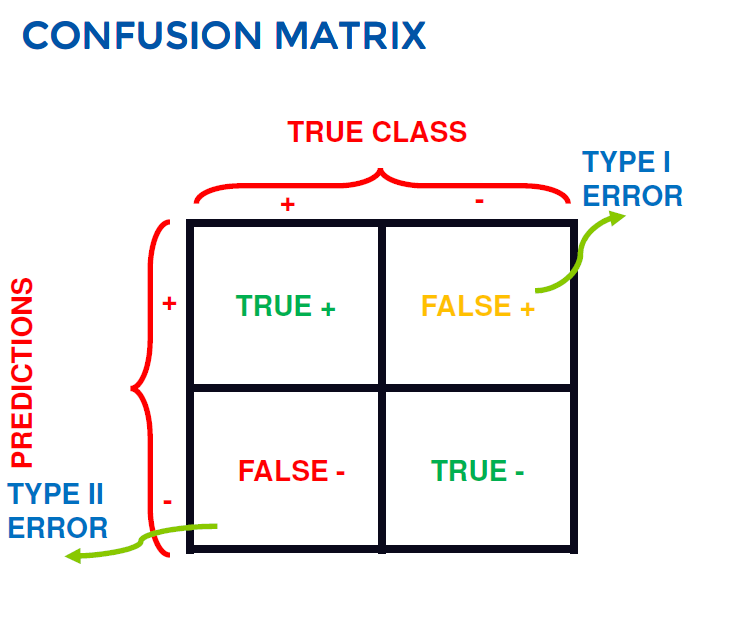

**--->  Les KPIs (Les Indicateurs de Performances Clés)**

* Une Matrice de Confusion est utilisée pour décrire les performances du modèle de classification : 
   * True Positves (TP) : est le cas où le classifieur prédit "True" par exemple ils ont une maladie et que la vraie classe est "True" (le patient a une maladie).

   * True Negatives (TN) : le cas où le modèle prédit "False" (pas de maladie par exemple) et que la vraie classe est "False" (le patient n'a as de pas maladie)

   * False Positives (FP) (Type I error) : le classifieur prédit "True" mais la classe correcte est "False" (le patient n'a pas de maladie)

   * False Negatives (FN) (Type II error) : le classifieur prédit "False" mais la vraie classe est "True"

   * Classiication Accuracy = (TP + TN) / (TP + TN + FP + FN)

   * Misclassification rate (Error Rate) = (FP + FN) / (TP + TN + FP + FN)

   * Precision = TP / Total TRUE Predictions = TP / (TP + FP) (Lorsque le modèle prédit la classe "True", à quelle précision le modèle est-il juste ?

   * Recall = TP / Actuel TRUE = TP / (TP + FN) (orsque la vraie classe est "True" , à quelle degrée le modéle est-il précis ?



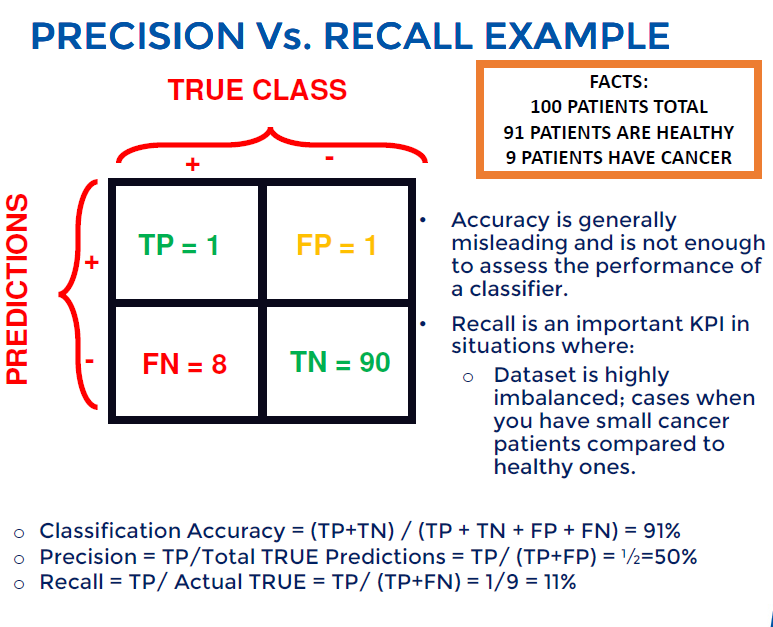

* L'Exactitude (Accuracy) est généralement trompeur et il n'est pas suffisant pour évaluer les performances du classifieur 

* Le "Recall" est un important indicateur de performance dans les situations où :

   * Le Dataset est non balancé (équilibré), par exemple le cas où on a petit nombre de patients ayant le cancer comparé à un gros nombre de patients en bonne santé 

## 17 - Evaluer la performance du modèle de classification des expressions faciales


In [ ]:
 with open("FacialExpression-model.json", "r") as json_file:
  json_savedModel = json_file.read()

# Charger l'architecture du modèle
model_2_emotion = tf.keras.models.model_from_json(json_savedModel)
model_2_emotion.load_weights("FacialExpression_weights.hdf5")
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
 # Evaluation du modèle
 score =model_2_emotion.evaluate(X_test, y_Test)
 print("Test Accuracy : {}".format(score[1]))

39/39 [==============================] - 1s 8ms/step - loss: 0.4981 - accuracy: 0.8145
Test Accuracy : 0.8022782802581787


In [ ]:
# Les différents KPIs 
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(len(accuracy))
epochs

range(0, 50)

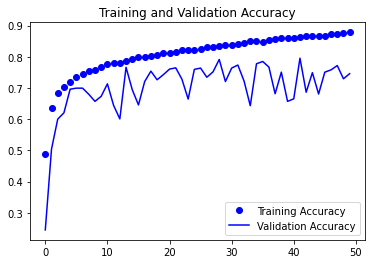

In [ ]:
# Représentation Graphique de l'accuracy de l'entrainement et de la validation
plt.plot(epochs, accuracy, "bo", label = "Training Accuracy")
plt.plot(epochs, val_accuracy, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

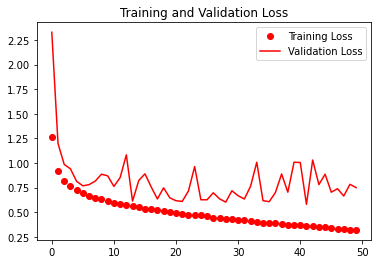

In [ ]:
# Représentation Graphique du Loss de l'entrainement et de la validation
plt.plot(epochs, loss, "ro", label = "Training Loss")
plt.plot(epochs, val_loss, "r", label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

In [ ]:
# On récupère les classes prédites et les vraies classes
predicted_classes = np.argmax(model_2_emotion.predict(X_test), axis = -1)
y_true = np.argmax(y_Test, axis = -1)

In [ ]:
y_true.shape

(1229,)

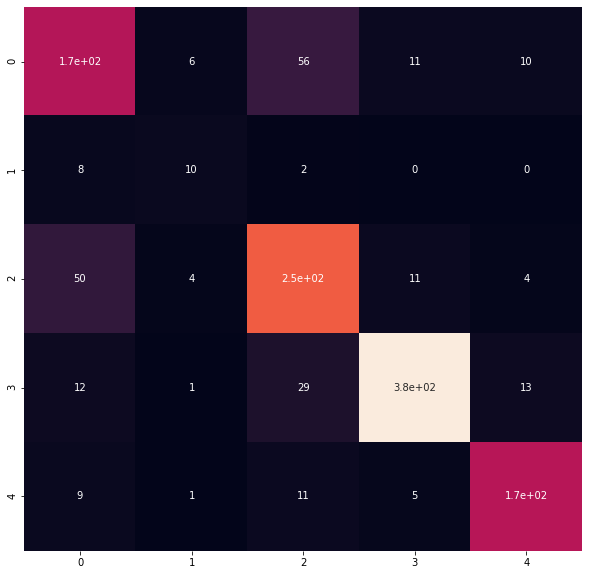

In [ ]:
# Représentation de la Matrice de Confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

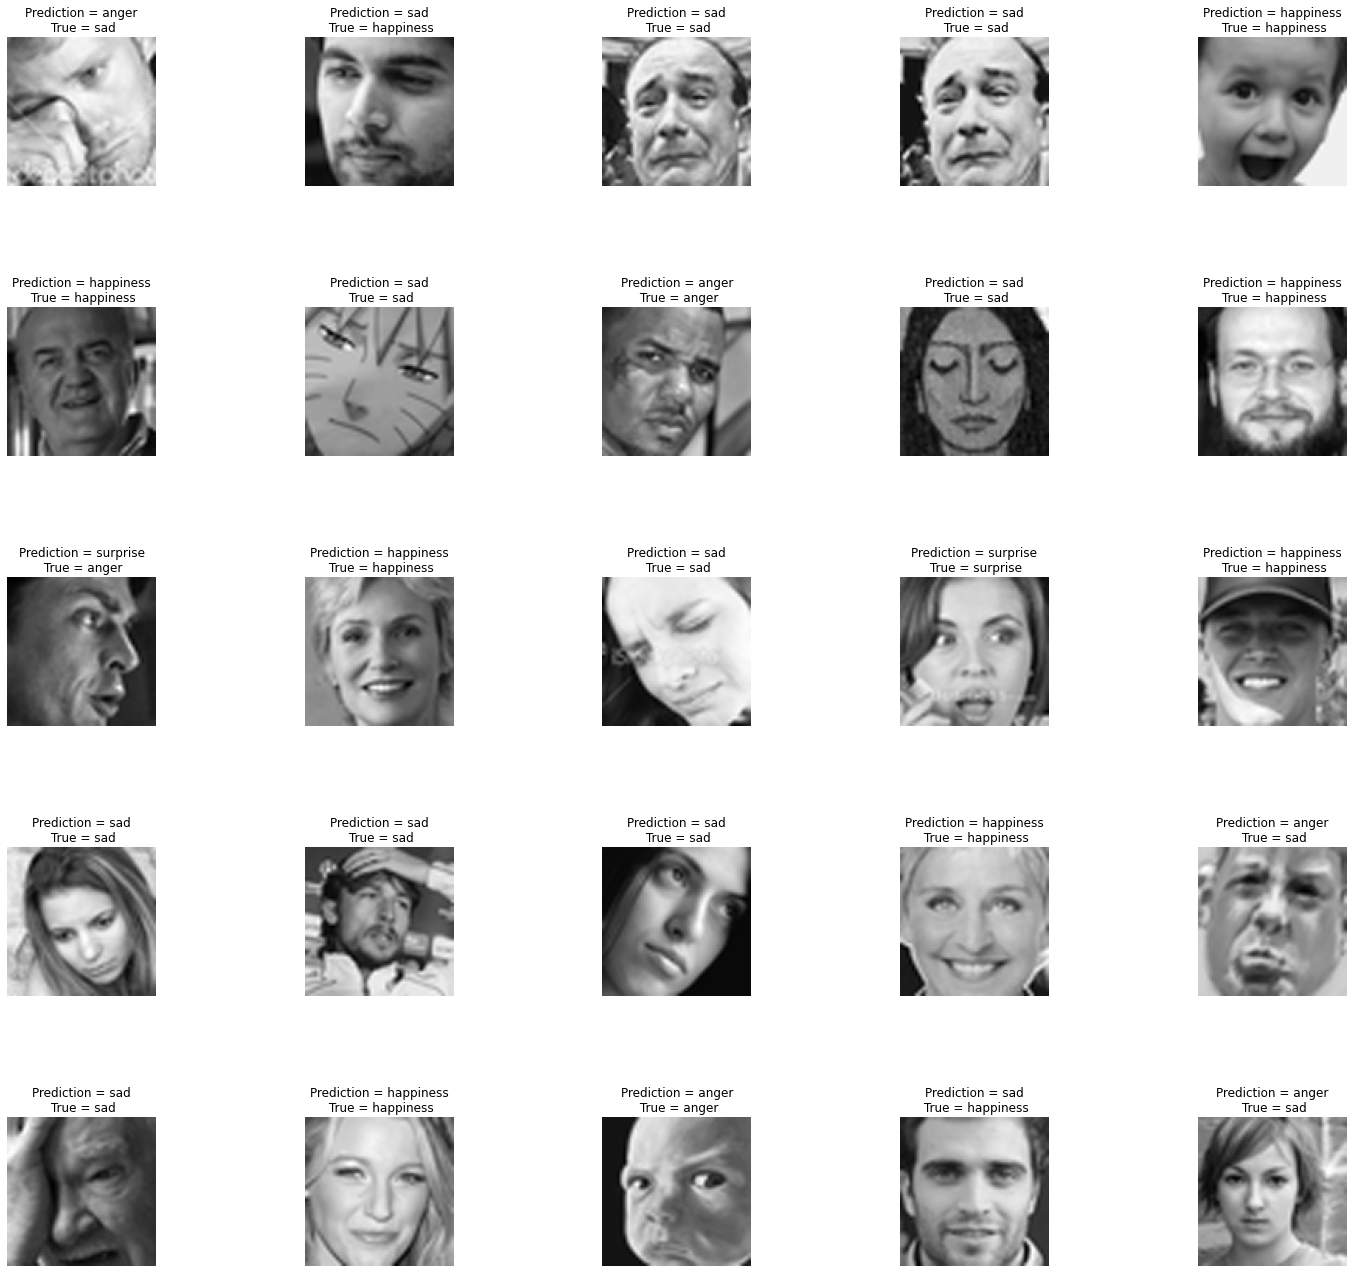

In [ ]:
# représentation de 25 images avec une prédiction de l'émotion présente sur l'image
L = 5
W = 5 

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i].reshape(96, 96), cmap = "gray")
  axes[i].set_title("Prediction = {}\n True = {}".format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
  axes[i].axis("off")

plt.subplots_adjust(wspace = 1)

In [ ]:
# Représentation des KPIs
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68       253
           1       0.45      0.50      0.48        20
           2       0.72      0.78      0.75       320
           3       0.93      0.87      0.90       437
           4       0.86      0.87      0.87       199

    accuracy                           0.80      1229
   macro avg       0.73      0.74      0.73      1229
weighted avg       0.81      0.80      0.80      1229



# Partie 3 : Combiner les 2 modèles dont la détection dees points faciaux clés et la classification des expressions faciales

## 18 - Effectuer des Prédictions sur les 2 modèles  

In [ ]:
def predict(X_test):
  #Effectuer des prédictions à partir du modèle des points faciaux clés
  df_predict = model_1_facialKeyPoints.predict(X_test)

  # Faire des predictions à partir de modèle des émotions
  df_emotion  = np.argmax(model_2_emotion.predict(X_test), axis = -1)

  # Redimensionner l'array de (856,) à (856, 1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Convertir les prédictions en Dataframe
  df_predict = pd.DataFrame(df_predict, columns   = columns)

  # Ajouter les émotions sur un Dataframe prédit
  df_predict["emotion"] = df_emotion

  return df_predict

In [ ]:
# Exécuter la fonction "predict"
df_predict = predict(X_test)

In [ ]:
df_predict.head()

left_eye_center_x  left_eye_center_y  ...  mouth_center_bottom_lip_y  emotion
0          64.213257          34.256458  ...                  84.102150        0
1          68.398605          31.361578  ...                  81.805969        2
2          63.455368          37.455776  ...                  76.481384        2
3          63.281216          35.571247  ...                  74.920143        2
4          26.195007          32.863926  ...                  82.615227        3

[5 rows x 31 columns]

### **MINI CHALLENGE**
* Représenter une grille 16 images ainsi que leurs émotions et leurs points faciaux clés


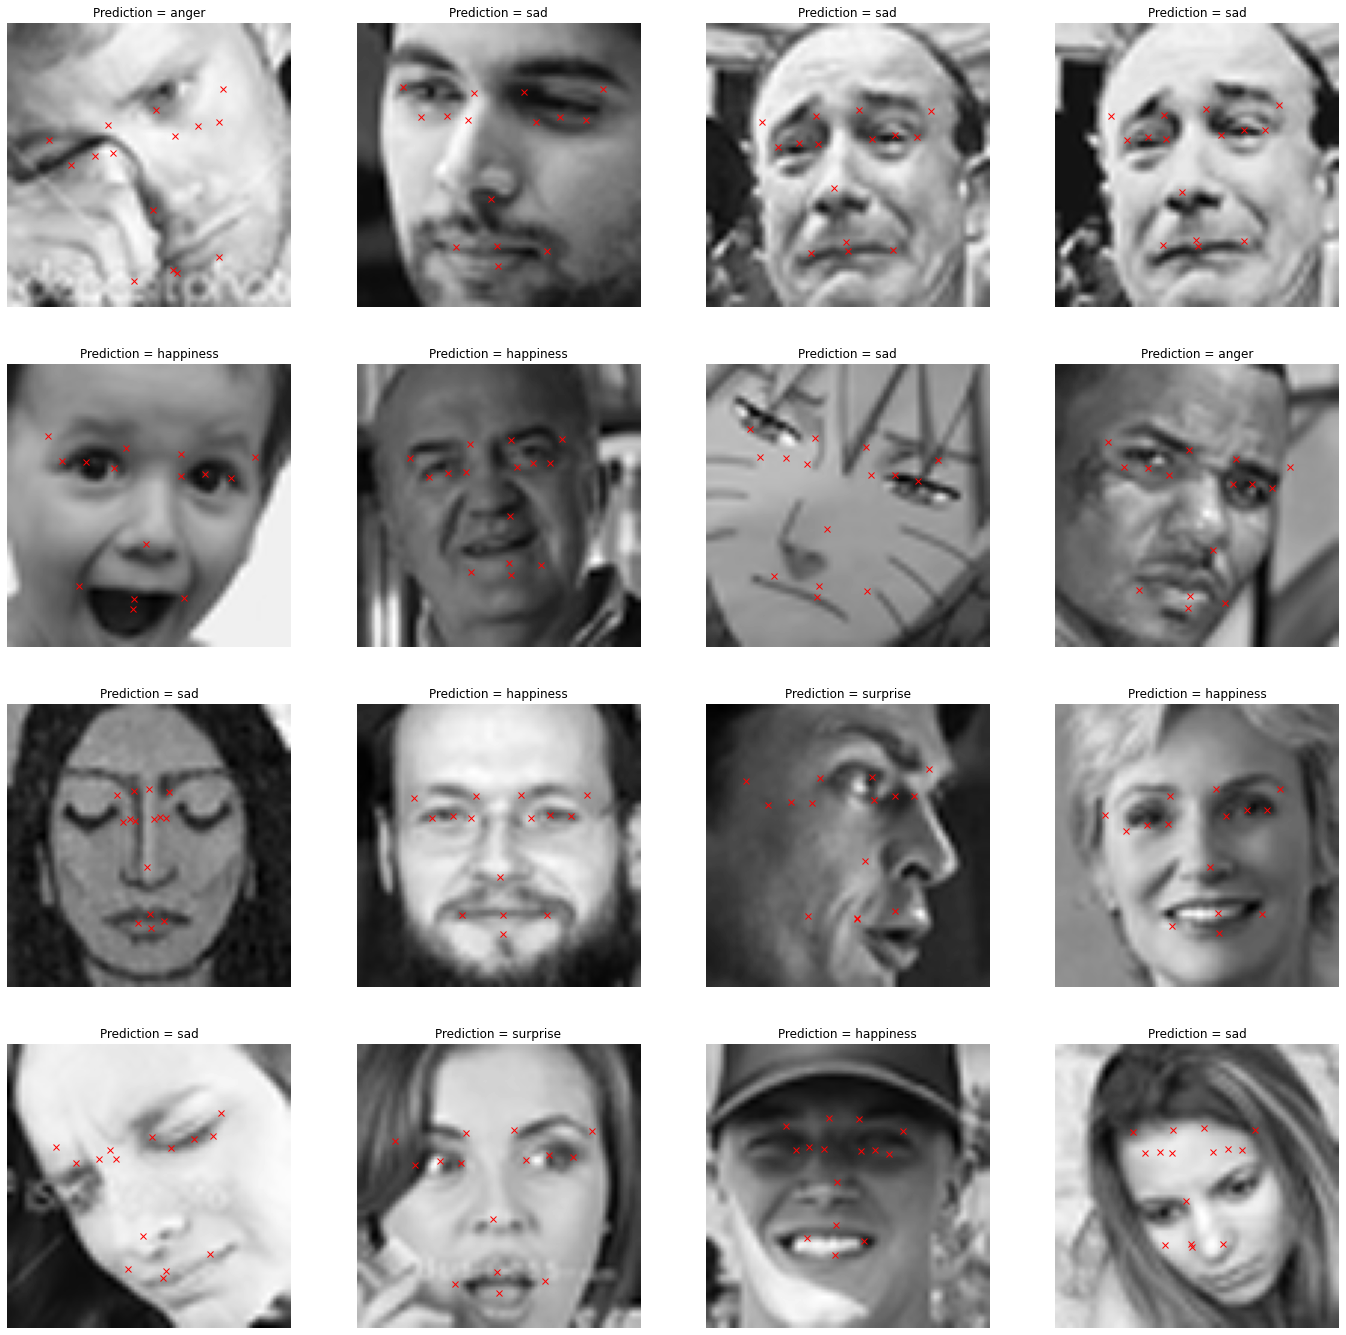

In [ ]:
#Voyons plus d'images sur un format en grille
fig, axes  = plt.subplots(4, 4, figsize = (24, 24))
axes = axes.ravel()

for i in range(16):
  axes[i].imshow(X_test[i].squeeze(), cmap ="gray")
  axes[i].set_title("Prediction = {}".format(label_to_text[df_predict["emotion"][i]]))
  axes[i].axis("off")
  for j in range(1, 31, 2):
    axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], "rx")

### **---> Déploiement du modèle en utilisant "Tensorflow Serving"**

* Supposons qu'on a déja entrainé notre modèle et il génére de bons résultats sur les données de test

* Maintenant on veut intégré notre modèle Tensorflow  entrainé dans une application web et déployer le modèle dans un environnement de niveau production.

* L'objectif précédant peut être atteint en utilisant le "Tensorflow Serving" système de service trés performant pour des modèles de Machine Learning, conçu pour des environnments de production

* Avec l'aide du "Tensorflow Serving", on peut facilement déployer de nouveaux algorithmes pour faire des prédictions

* Dans le but de servir le modèle entrainé en utilisant le "Tensorflow Serving", on a besoin d'enregistrer le modèle dans un format qui est favorable pour le service en utilisant "Tensorflow Serving"

* Le modèle va avoir un numéro de version et il sera enregistré sur une direction structurée.

* Après que le modèle soit sauvé, on peut maintenant utiliser le "Tensorflow Serving" pour commencer à faire une requête d'inférence en utilisant une version spécifique de notre "servable" modèle entrainé.


### **---> Exécuter le "Tensorflow Serving"**

* Ci-dessous certains paramétres importantes

  * rest_api_port : Le port qu'on va utiliser pour la requête REST
  * model_name : On va l'utiliser dans l'URL de la requête REST. On peut choisir n'importe quel nom
  * model_base_path : C'est le chemin vers la direction où j'ai enregistré notre modèle 

* Pour plus d'informations concernant le "REST", voire : [Code Academy - REST](https://www.codeacademy.com/articles/what-is-rest)

* Le "REST" est une renaissance du "HTTP" dans lequel les commandes HTTP ont une signification sémantique (significative)

### **---> Effectuer des requêtes dans le "Tensorflow Serving"**

* Dans le but de faire des prédictions en utilisant le "Tensorflow Serving, on a besoin de passer la requête inférencielle (Données Images) à un objet JSON

  * Inférence = Opération par laquelle on passe d'une assertion considérée comme vraie à une autre assertion au moyen d'un système de règles qui rend cette deuxième assertion également vraie.

* Ensuite, on utilise les librairies de requête Python pour faire une requête POST au modèle déployé en passant dans l'objet JSON la requête contenant l'inférence (données images)

* Finallemnt, on obtient les predictions à partir de la requête POST fait au modèle déployé et puis utiliser la fonction "argmax" pour trouver les classes prédites.

### **---> NOTE :**

* Maintenant on besoin d'enregistrer notre modèle entrainé et il doit être enregitré sous le format du "SavedModel" 

* Le modèle va avoir un numéro de version et il sera enregistré dans une direction structurée.

* **"tf.saved_model.save"** est une fonction utilisée pour construire le modèle sauvé qui est adéquat pour le service en utilisant "Tensorflow Serving"

* Aprés que le modèle soit sauvé, on peut maintenant utiliser le "Tensorflow Serving" afin de commencer à faire des requêtes inférencielles en utilisant une version spécifique de modèle "servable" entrainé.

* Utiliser le **"SavedModel"** pour enregistrer et charger les variables du modèle, le graphique (**graph**), les métadonnées du graphique.

* Voire pour plus d'informations :  [SavedModel](https://www.tensorflow.org/guide/saved_model)

In [ ]:
import json
import tensorflow.keras.backend as KeyboardInterrupt

def deploy(directory, model):
  MODEL_DIR = directory
  version = 1 

  # On joint la direction temporelle du modèle avec le numéro de la version choisie
  export_path = os.path.join(MODEL_DIR, str(version))
  print("export_path = {}\n".format(export_path))

  # On enregistre le modèle en utilisant "saved_model.save"
  # Si la direction existe déjà, on va la supprimer en utilisant la commande "!rm" 
  # Cette commande efface chaque fichier spécifié dans la ligne de commande
  if os.path.isdir(export_path):
    print("\nAlready saved a model, cleaning up\n")
    !rm -r {export_path}

  tf.saved_model.save(model, export_path)
  os.environ["MODEL_DIR"] = MODEL_DIR

## 20 - Servir le modèle en utilisant **Tensorflow Serving**

In [ ]:
# On va ajouter le package "tensorflow-model-server" à notre liste de packages
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  29727      0 --:--:-- --:--:-- --:--:-- 30030
OK
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Re

In [ ]:
# On installe le "tensorflow-model-server"
!apt-get install tensorflow-model-server 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 51 not upgraded.
Need to get 223 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.4.0 [223 MB]
Fetched 223 MB in 3s (67.2 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 146364 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.4.0_all.deb ...
Unpacking tensorflow-model-server (2.4.0) ...
Setting up tensorflow-model-server (2.4.0) ...


---> **On exécute le Tensorflow Serving**

* On va charger notre modèle et commencer à faire des inférences (prédictions) en se basant sur le modèle déja entrainé

In [ ]:
# On déploie le modèle de détection des points faciaux clés
deploy("/model", model_1_facialKeyPoints)

export_path = /model/1

INFO:tensorflow:Assets written to: /model/1/assets


In [ ]:
# Lancement du serveur sur le Port: 4500
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=4500 \
  --model_name=keypoint_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 0 in a separate thread.


In [ ]:
# Maintenant on voit ce qui se passe dans le background contenu dans fichier "log"
!tail server.log

2021-01-21 17:58:20.353880: W external/org_tensorflow/tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 33554432 exceeds 10% of free system memory.
2021-01-21 17:58:20.383062: W external/org_tensorflow/tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 33554432 exceeds 10% of free system memory.
2021-01-21 17:58:20.411860: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:190] Running initialization op on SavedModel bundle at path: /model/1
2021-01-21 17:58:20.458185: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:277] SavedModel load for tags { serve }; Status: success: OK. Took 354613 microseconds.
2021-01-21 17:58:20.468521: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /model/1/assets.extra/tf_serving_warmup_requests
2021-01-21 17:58:20.468874: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: keypoint_model version: 1}
2021-01-

In [ ]:
# On déploie le modèle de détection des émotions
deploy("/model1", model_2_emotion)

export_path = /model1/1

INFO:tensorflow:Assets written to: /model1/1/assets


In [ ]:
# Lancement du serveur sur le Port: 4000
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=4000 \
  --model_name=emotion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 2 in a separate thread.


In [ ]:
# Maintenant on voit ce qui se passe dans le background contenu dans fichier "log"
!tail server.log

2021-01-21 17:59:14.962617: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:206] Restoring SavedModel bundle.
2021-01-21 17:59:14.970853: I external/org_tensorflow/tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200000000 Hz
2021-01-21 17:59:15.110997: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:190] Running initialization op on SavedModel bundle at path: /model1/1
2021-01-21 17:59:15.153796: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:277] SavedModel load for tags { serve }; Status: success: OK. Took 281469 microseconds.
2021-01-21 17:59:15.164329: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /model1/1/assets.extra/tf_serving_warmup_requests
2021-01-21 17:59:15.164776: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: emotion_model version: 1}
2021-01-21 17:59:15.166939: I tensorflow_serving/model_servers/server.c

* **Félicitations ! Maintenant on a chargé avec succés une version servable de notre modèle { *name* : keypoint_model *version* : 1}** 

* **Félicitations ! Maintenant on a chargé avec succés une version servable de notre modèle { *name* : emotion_model *version* : 1}** 

## 21 - Effectuer des Requêtes sur le Modèle Servi sur **Tensorflow Serving** 

In [ ]:
import json 

# On crée un objet JSON et faire 3 requêtes inférencielles

data = json.dumps({"signature_name": "serving_default", "instances": X_test[0:3].tolist()})
print("Data: {} ... {}".format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ... 67], [0.36255714297294617], [0.3495713770389557]]]]}


In [ ]:
X_test[0:3]

array([[[[0.3399017 ],
         [0.30603027],
         [0.25062376],
         ...,
         [0.6432815 ],
         [0.57736105],
         [0.5370954 ]],

        [[0.33009195],
         [0.2987373 ],
         [0.24735358],
         ...,
         [0.64318323],
         [0.5896255 ],
         [0.5566928 ]],

        [[0.31453672],
         [0.2871241 ],
         [0.24203396],
         ...,
         [0.6425001 ],
         [0.608846  ],
         [0.5877106 ]],

        ...,

        [[0.71051776],
         [0.68109006],
         [0.6325423 ],
         ...,
         [0.7740188 ],
         [0.7407289 ],
         [0.7209667 ]],

        [[0.73802024],
         [0.7391973 ],
         [0.74166995],
         ...,
         [0.7231958 ],
         [0.69382244],
         [0.67639726]],

        [[0.7549623 ],
         [0.77463543],
         [0.8079552 ],
         ...,
         [0.6931573 ],
         [0.6654424 ],
         [0.6490089 ]]],


       [[[0.2227022 ],
         [0.2304301 ],
         [0.24

In [ ]:
!pip install -q requests

In [ ]:
import requests
# La fonction pour faire des prédictions à partir des modèles déployés 
def response(data):
  headers = {"content-type": "application/json"}
  json_response = requests.post("http://localhost:4500/v1/models/keypoint_model/versions/1:predict", data=data, headers=headers, verify=False)
  df_predict = json.loads(json_response.text)["predictions"]
  json_response = requests.post("http://localhost:4000/v1/models/emotion_model/versions/1:predict", data=data, headers=headers, verify=False)
  df_emotion = np.argmax(json.loads(json_response.text)["predictions"], axis=1)

  # Redimensionner l'array de (856,) à (856, 1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Convertir les prédictions en Dataframe
  df_predict = pd.DataFrame(df_predict, columns=columns)

  # Ajouter les émotions dans le Dataframe des prédictions
  df_predict["emotion"] = df_emotion

  return df_predict

In [ ]:
# Faire les prédictions sur de nouvelles données
df_predict = response(data)
df_predict

left_eye_center_x  left_eye_center_y  ...  mouth_center_bottom_lip_y  emotion
0          64.213219          34.256458  ...                  84.102142        0
1          68.398613          31.361582  ...                  81.805954        2
2          63.455364          37.455784  ...                  76.481407        2

[3 rows x 31 columns]

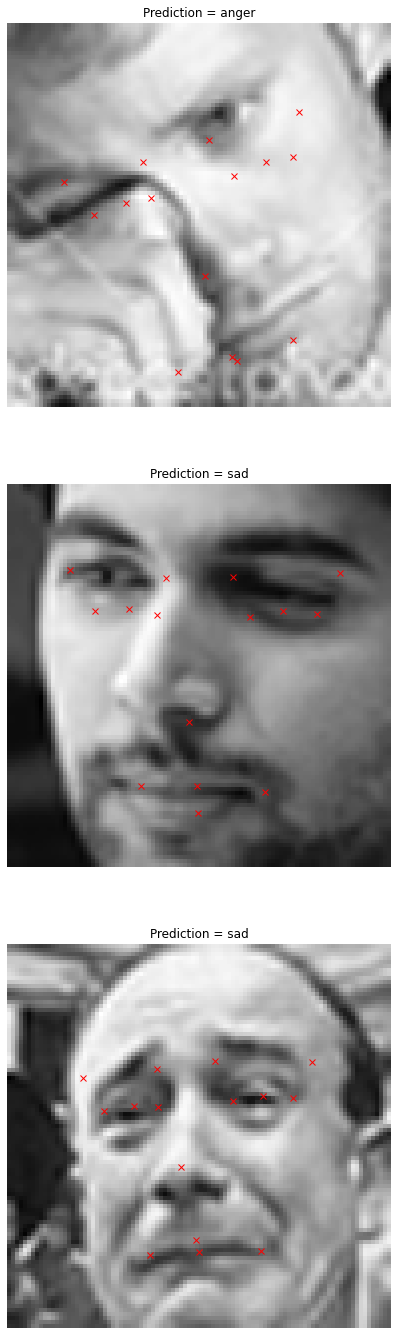

In [ ]:
# Représenter Graphiquement les images de tests et leurs points clés prédits ainsi que leurs émotions

fig, axes = plt.subplots(3, 1, figsize = (24, 24))
axes = axes.ravel()

for i in range(3):
  axes[i].imshow(X_test[i].squeeze(), cmap = "gray")
  axes[i].set_title("Prediction = {}".format(label_to_text[df_predict["emotion"][i]]))
  axes[i].axis("off")
  for j in range(1, 31, 2):
    axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], "rx")

#################################################
########### EXCELLENT TRAVAIL :) XD ! ###########
#################################################